*Warning:* This puzzle contains total spoilers for the 2017 MIT Mystery Hunt Puzzle "Chromesthesia".

This post is an 

In [2]:
using Images

In [3]:
using ColorTypes

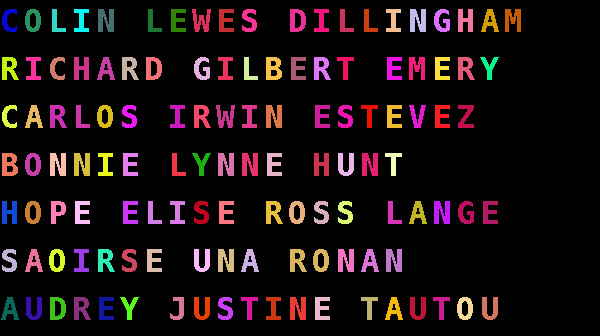

In [4]:
im = load("image01.png")

In [142]:
im[:,10]

In [152]:
im[:,58]

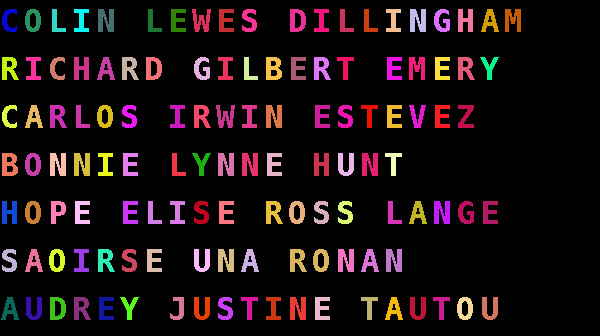

In [26]:
imv = convert(Image{HSV}, float32(im))

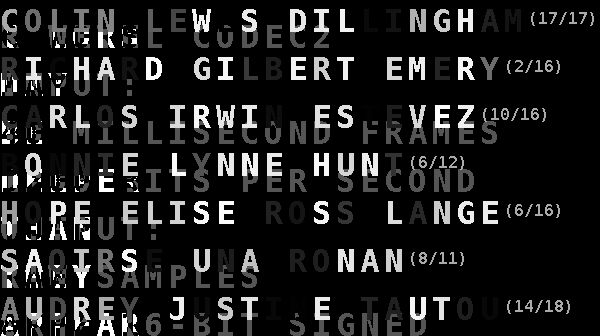

In [27]:
[convert(Gray, p.h / 360) for p in imv]

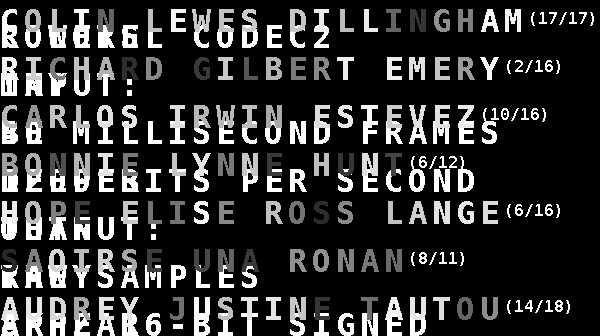

In [29]:
[convert(Gray, p.s) for p in imv]

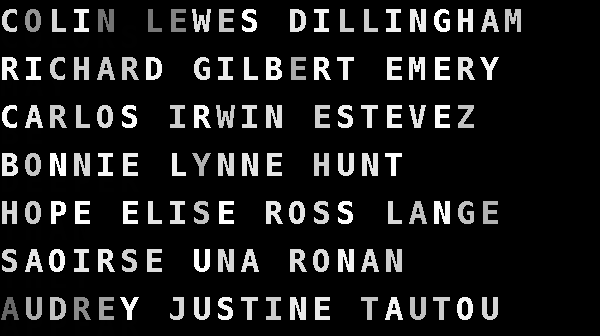

In [30]:
[convert(Gray, p.v) for p in imv]

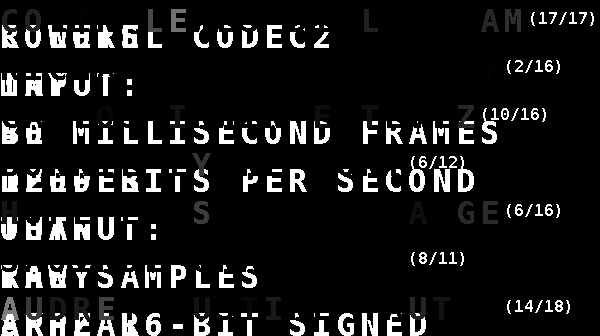

In [32]:
[convert(Gray, max(p.s - p.v, 0)) for p in imv]

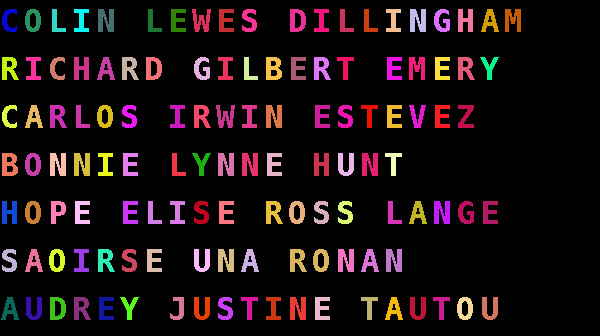

In [44]:
imxyz = convert(Image{Lab}, float32(im))

In [50]:
function showchannel(im, field)
    lb = minimum(getfield(p, field) for p in im)
    ub = maximum(getfield(p, field) for p in im)
    [convert(Gray, (getfield(p, field) - lb) / (ub - lb)) for p in im]
end

showchannel (generic function with 1 method)

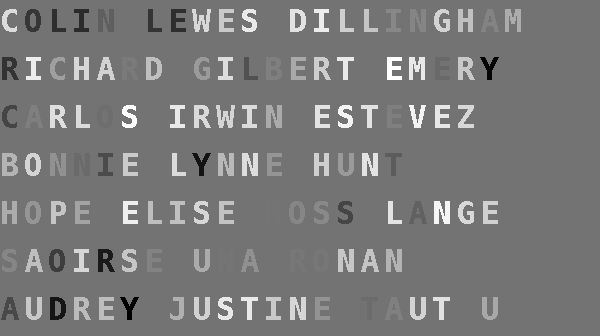

In [53]:
showchannel(imxyz, :a)

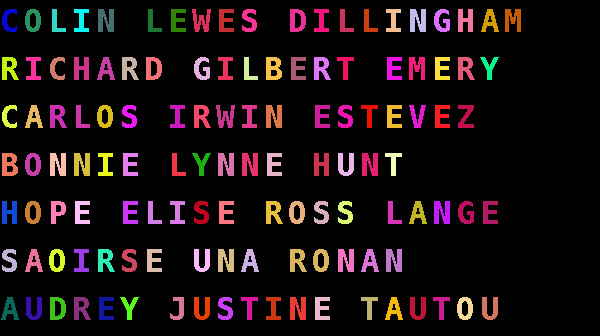

In [54]:
imhsv = convert(Image{HSV}, float32(im))

In [130]:
(size(im, 2) - 10) / 7

46.57142857142857

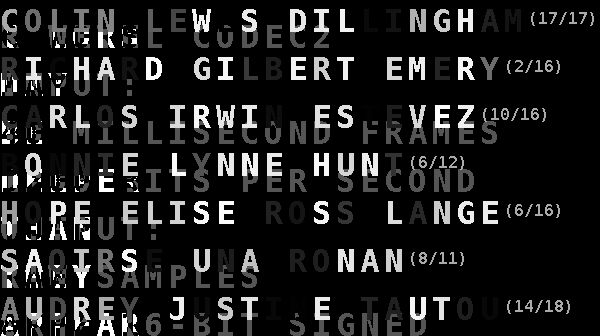

In [66]:
showchannel(imhsv, :h)

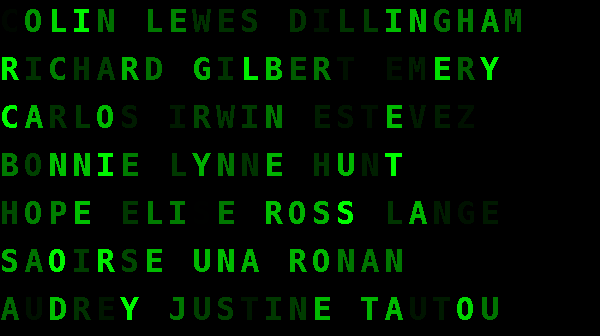

In [158]:
im_nored = [RGB(0, green(p), 0) for p in im]

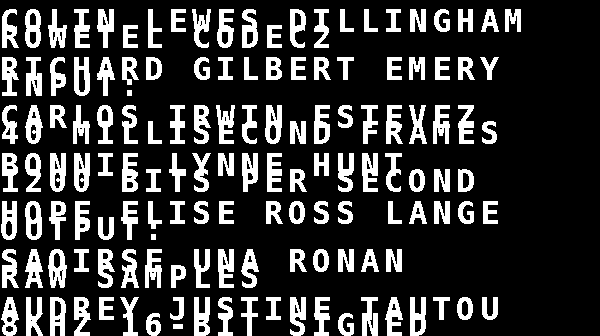

In [159]:
showchannel(convert(Image{HSV}, im_nored), :h)

In [157]:

open("colors.dat", "w") do f
    for row in 10:48:size(im, 2)
        lastcolor = im[1,row]
        for p in im[:,row]
            if p == lastcolor || (red(p) == 0 && green(p) == 0 && blue(p) == 0)
                continue
            end
            lastcolor = p
            for field in [:r, :g, :b]
                write(f, (reinterpret(UInt16, getfield(p, field)) >> 8) % UInt8)
                write(f, reinterpret(UInt16, getfield(p, field)) % UInt8)
            end
        end
    end
end